# IPython Notebook Initialization

In [1]:
%pylab inline
import numpy as np
import math
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab

colors = ['#a6cee3', 
          '#1f78b4', 
          '#b2df8a', 
          '#33a02c', 
          '#fb9a99', 
          '#e31a1c', 
          '#fdbf6f', 
          '#ff7f00']

# Set plot aspect ratio to 'the golden ratio.'
fig_width     = 6.5
golden_ratio  = (np.sqrt(5)-1.0)/2.0
fig_height    = fig_width*golden_ratio
fig_size      =  [fig_width,fig_height]
fig_font_size = 22

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

params        = { 'axes.labelsize' : 12,
                  'axes.titlesize' : 12,
                  'backend'        : 'ps',
                  'font.family'    : 'serif',
                  'font.size'      : fig_font_size,
                  'legend.fontsize': fig_font_size / 2,
                  'figure.dpi'     : 150,
                  'figure.figsize' : fig_size,
                  'savefig.dpi'    : 300,
                  'savefig.bbox'   : 'tight',
                  'text.usetex'    : True,
                  'xtick.labelsize': fig_font_size / 2,
                  'ytick.labelsize': fig_font_size / 2,
}

pylab.rcParams.update(params)  

Populating the interactive namespace from numpy and matplotlib


# Initialize Constants

In [2]:
mO = 2.6567626E-26
mH = 1.6737236E-27
kb = 1.38064852E-23

In [3]:
def g(v, N, m, T):
    return(
        (np.sqrt(2.)*np.pi*N*np.power(m,(3./2.))) 
        / 
        np.power((np.pi * kb * T), 3./2.) 
        * np.power(v,2.) 
        * np.exp(-(np.multiply(m,np.power(v,2.)))/(2.*kb*T))
    )

def H(E, N, T):
    return(
        (2.*np.pi*N) 
        / 
        (np.sqrt(E)*np.power((np.pi * kb * T), 3./2.))
        * E
        * np.exp(-(E/(kb*T)))
    )

# Test evaluations.
print(g(v = 1000., N = 2.7E16, m = 2.657E-26, T = 300.))
print(H(E = 1E-24, N = 2.7E16,                T = 300.))

1.41617027514e+13
1.14263465351e+35


# Problem 1 Plots

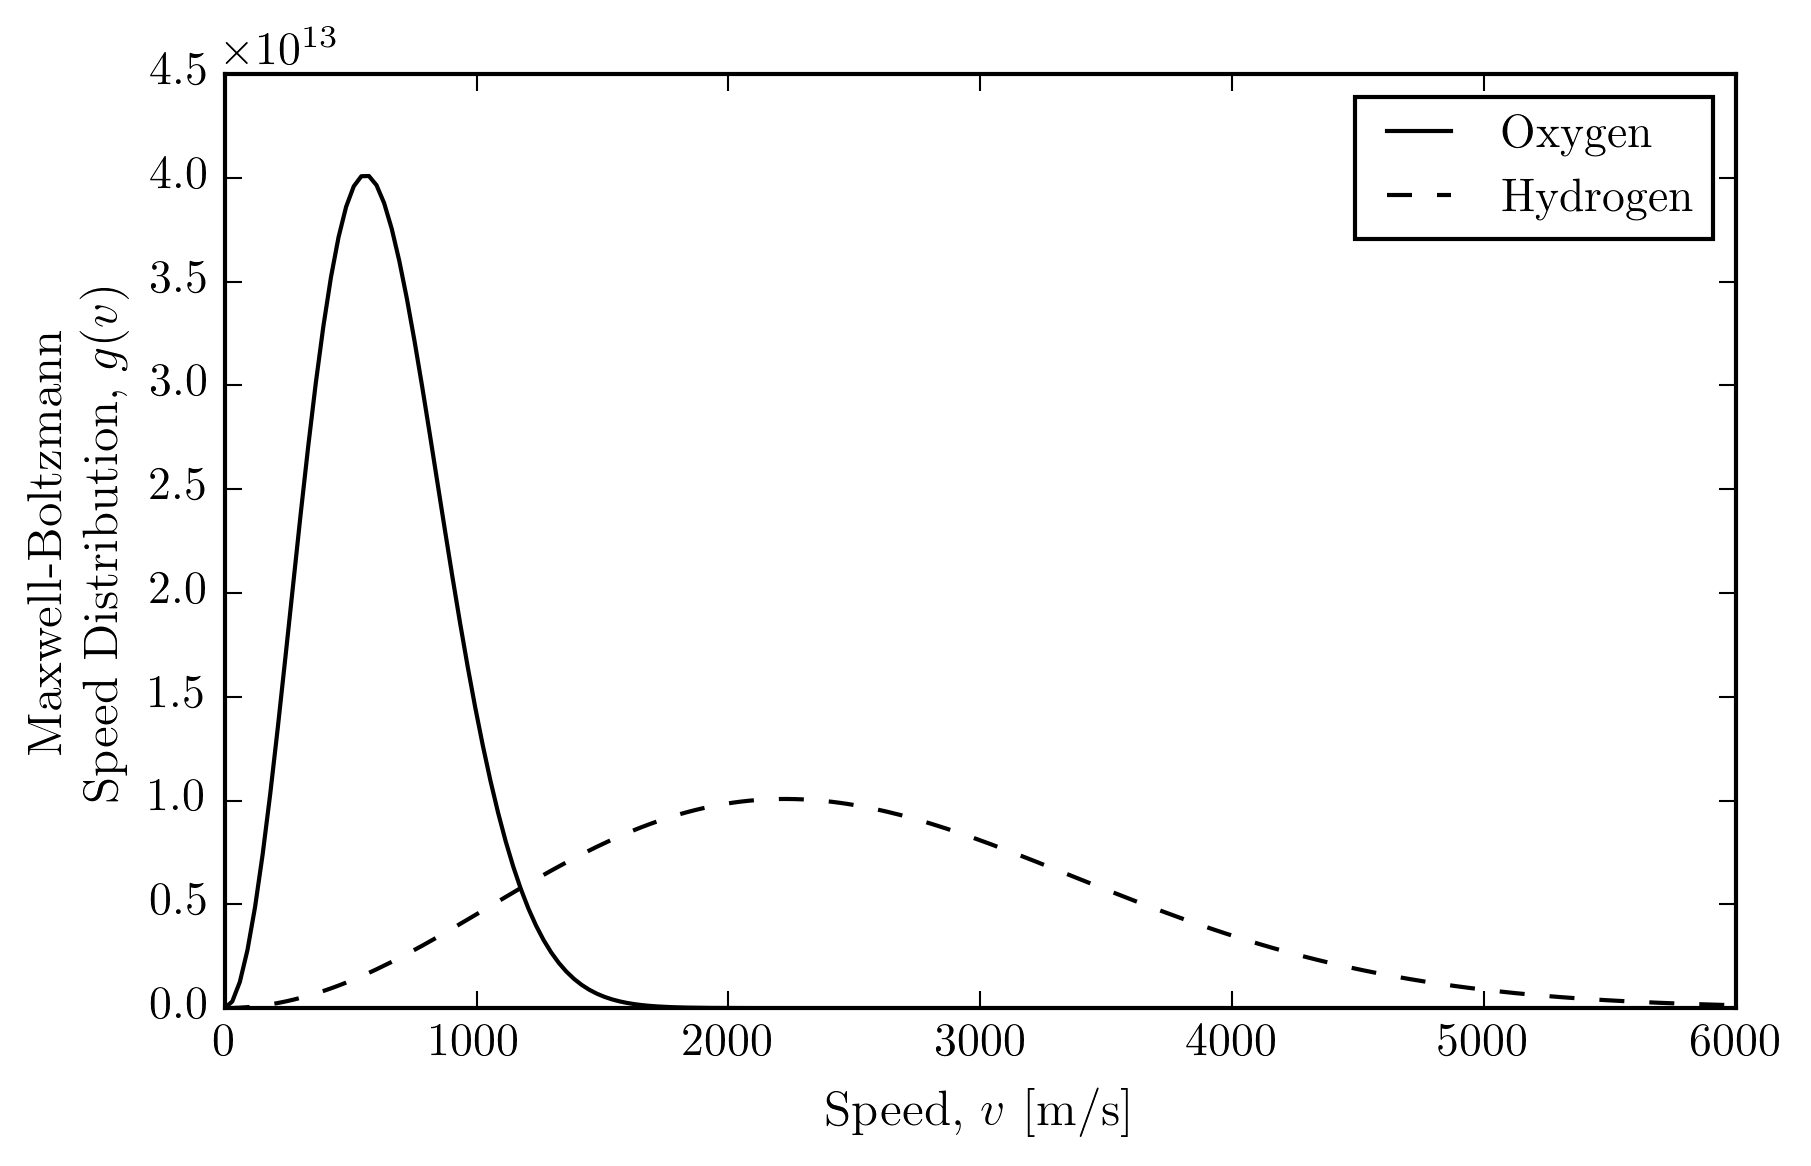

In [4]:
# Initialize velocity space.
v = np.linspace(0,6000,200)

plt.figure()
ax = plt.gca()  
plt.plot(v,
         g(v, N = 2.7E16, m = mO, T = 300.), 
         color='#000000', 
         linestyle='-',
         label='Oxygen')
plt.plot(v,
         g(v, N = 2.7E16, m = mH, T = 300.), 
         color='#000000', 
         linestyle='--',
         label='Hydrogen')
ax.set_xlabel('Speed, $v$ [m/s]')
ax.set_ylabel('Maxwell-Boltzmann \n Speed Distribution, $g(v)$')
plt.legend()
plt.savefig('NERS_471_HW1_Problem_1.png')

# Problem 2 Plots

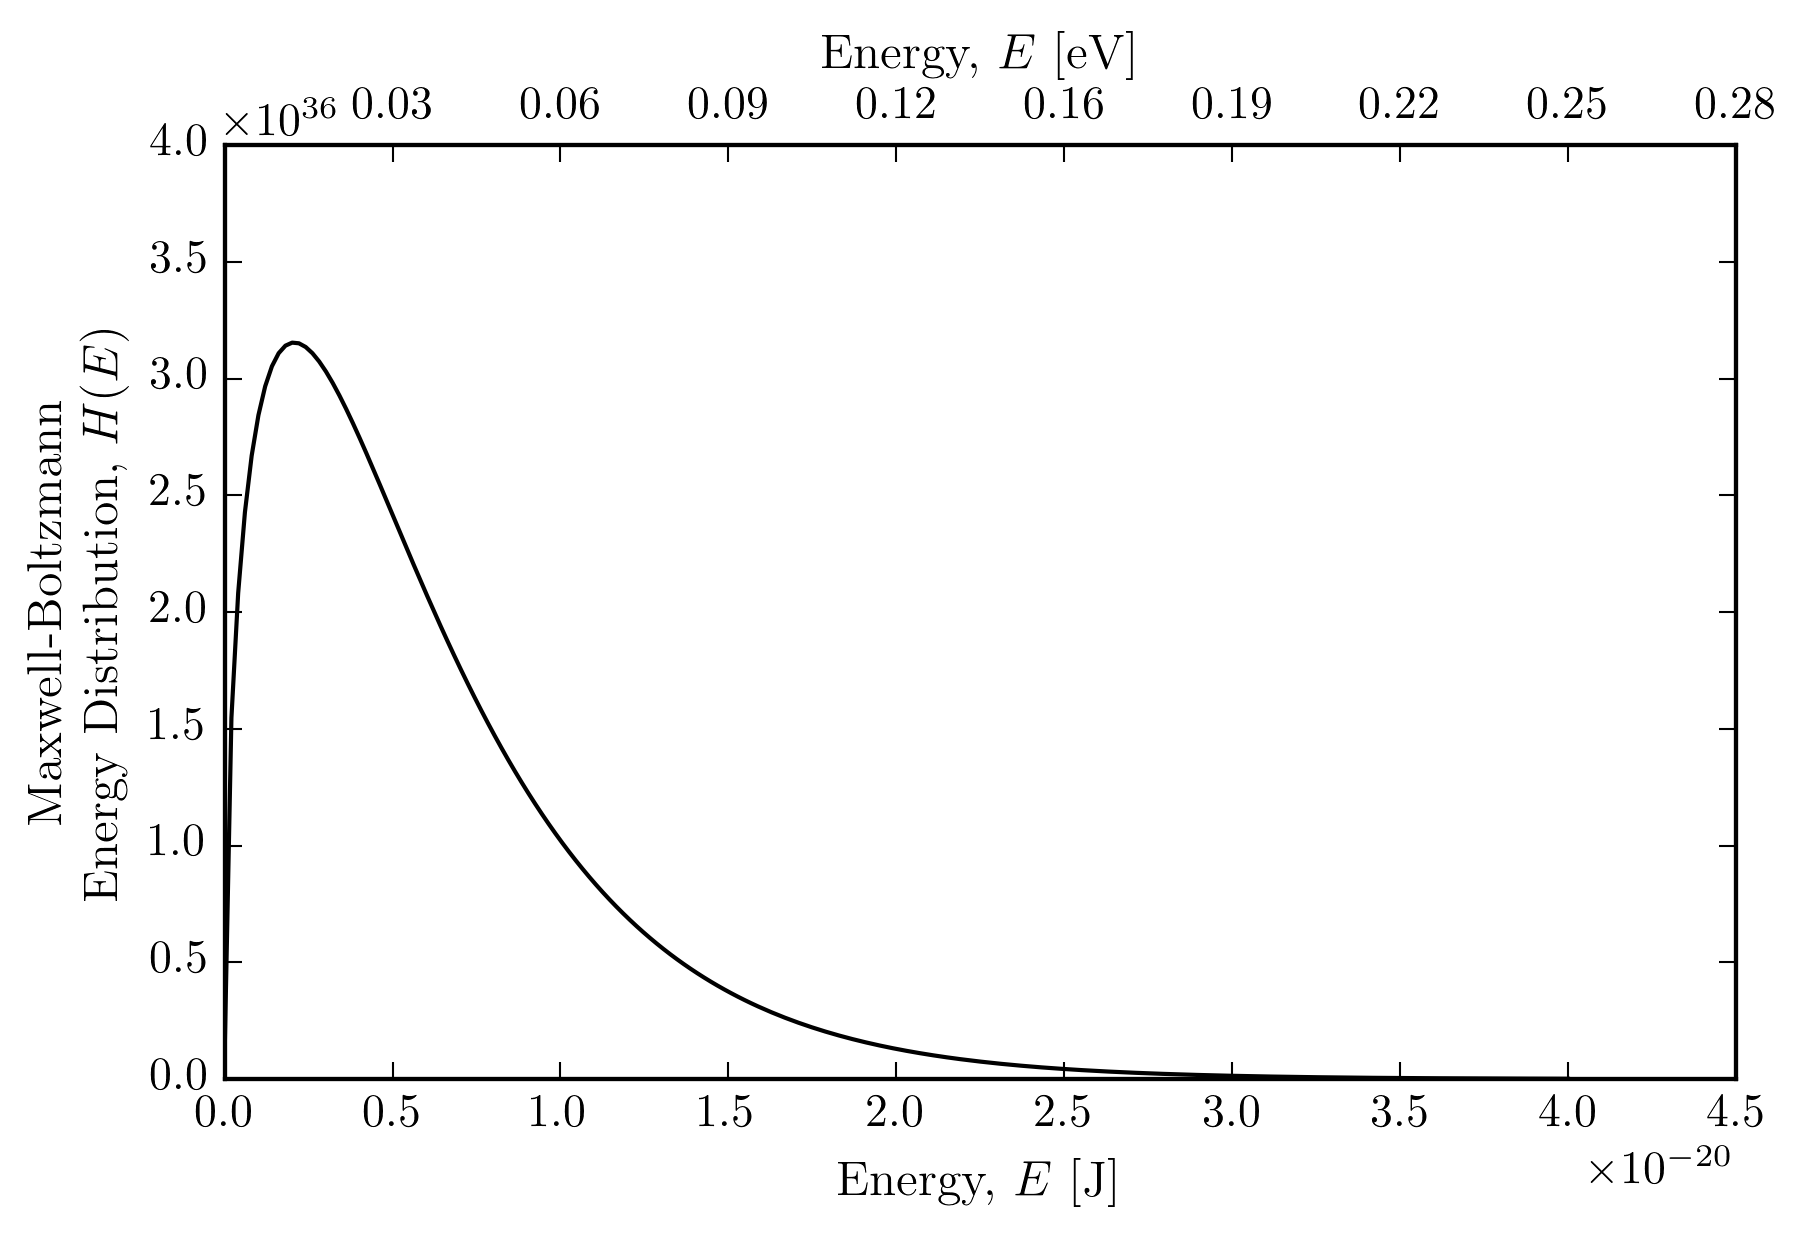

In [6]:
E = np.linspace(1e-24, 4e-20, 200)

# Primary plot (on primary axes)
plt.figure()
ax = plt.gca()  
ax.plot(E,
         H(E, N = 2.7E16, T = 300.), 
         color='#000000', 
         linestyle='-')
ax.set_xlabel('Energy, $E$ [J]')
ax.set_ylabel('Maxwell-Boltzmann \n Energy Distribution, $H(E)$')

##############################

def xtick_convert(x):
    return(["%.2f" % z for z in x * 1/1.60217662E-19])

xticks = ax.xaxis.get_majorticklocs()
yticks = ax.yaxis.get_majorticklocs()

xmin2, xmax2 = np.min(xticks), np.max(xticks)
ymin2, ymax2 = np.min(yticks), np.max(yticks)

ax2 = ax.twiny()
ax2.set_xlabel('Energy, $E$ [eV]')
axis([xmin2, xmax2, ymin2, ymax2])

xticks2 = ax2.xaxis.get_majorticklocs()[1:]

ax2.set_xticks(xticks2)
ax2.set_xticklabels(xtick_convert(xticks2))

##############################

plt.savefig('NERS_471_HW1_Problem_2.png')